In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
a = np.zeros(5, dtype='int')
print(a)

[0 0 0 0 0]


In [30]:
print("amp{}".format(1))

amp1


In [47]:
from pyspcm import *

datapoint = int64(int(MEGA(1250) * 0.4))

Python Version: 3.9.12 on Windows



In [32]:
data_point = 25000
wave_point = np.zeros(data_point, dtype='int')
for i in range(data_point):
    wave_point[i] = int(10000 * np.sin(MEGA(1) / MEGA(1250) * i))

In [33]:
print(wave_point[2])

15


In [34]:
a = []
b = np.array([1, 2, 3, 4])
res = np.append(a, b)
res.astype(int)

array([1, 2, 3, 4])

In [35]:
KILO_B(64) / MEGA(1250) * 10 ** 6

52.4288

In [36]:
name = "420_1"
name.split('_')

['420', '1']

In [86]:
def wave_calculate(samplerate, waveform_cont_420, waveform_cont_1013):
    amp_std = 30000

    # first we compare time consume of 420 and 1013
    wave_time_420 = 0
    for single_wave_420 in waveform_cont_420:
        print(single_wave_420)
        wave_time_420 += single_wave_420.time
        wave_time_420 += single_wave_420.wait_time
    wave_time_1013 = 0
    for single_wave_1013 in waveform_cont_1013:
        print(single_wave_1013)
        wave_time_1013 += single_wave_1013.time
        wave_time_1013 += single_wave_1013.wait_time

    wave_point_num = int(samplerate * wave_time_420 * 10 ** -6)
    if wave_time_420 < wave_time_1013:
        wave_point_num = int(samplerate * wave_time_1013 * 10 ** -6)
    wave_point_420 = []
    wave_point_1013 = []
    # then we need to calculate each wave point according to wave_form_cont
    for single_wave in waveform_cont_420:
        single_wave_point = np.zeros(int(samplerate * (single_wave.time + single_wave.wait_time) * 10 ** -6),
                                     dtype='int')
        if single_wave.form == "flat pulse":

            amp_ratio = single_wave.amp * 0.01
            frequency = MEGA(single_wave.start_frequency)
            signal_point = int(samplerate * single_wave.time * 10 ** -6)
            wait_point = samplerate * single_wave.wait_time * 10 ** -6
            for i in range(signal_point):
                single_wave_point[i] = int(amp_std * amp_ratio * np.sin(2 * np.pi * frequency / samplerate * i))
        elif single_wave.form == "blackman pulse":
            pass
        elif single_wave.form == "ramp frequency":
            pass

        wave_point_420 = np.append(wave_point_420, single_wave_point)
    wave_point_420 = np.asarray(wave_point_420, dtype='int')
    print(type(wave_point_420[0]))

    for single_wave in waveform_cont_1013:
        single_wave_point = np.zeros(int(samplerate * (single_wave.time + single_wave.wait_time) * 10 ** -6),
                                     dtype='int')
        if single_wave.form == "flat pulse":
            amp_ratio = single_wave.amp * 0.01
            frequency = MEGA(single_wave.start_frequency)
            signal_point = int(samplerate * single_wave.time * 10 ** -6)
            wait_point = samplerate * single_wave.wait_time * 10 ** -6
            for i in range(signal_point):
                single_wave_point[i] = int(amp_std * amp_ratio * np.sin(2 * np.pi * frequency / samplerate * i))
        elif single_wave.form == "blackman pulse":
            pass
        elif single_wave.form == "ramp frequency":
            pass
        wave_point_1013 = np.append(wave_point_1013, single_wave_point)
    wave_point_1013 = np.asarray(wave_point_1013, dtype='int')
    print(type(wave_point_1013[0]))
    if wave_time_420 > wave_time_1013:
        wave_point_1013 = np.pad(wave_point_1013, [(0, wave_point_num - len(wave_point_1013))])
    else:
        wave_point_420 = np.pad(wave_point_420, [(0, wave_point_num - len(wave_point_420))])

    # then we insert wave_point_1013 into wave_point_420 to construct wave_point
    idx = tuple(range(1, wave_point_num + 1))
    wave_point = np.insert(wave_point_420, idx, wave_point_1013)
    print(type(wave_point[0]))
    return wave_point, wave_point_420, wave_point_1013

In [ ]:
a = np.array([[1, 1], [2, 2], [3, 3]])
b = a.flatten()
np.insert(b, slice(2, 4), [5, 6])

In [ ]:
a = np.array([1, 3, 5, 7, 9])
idx = (1, 3, 5)
print(type(idx))
np.insert(a, idx, [2, 4, 10])

In [ ]:
index = tuple(range(1, 10))
print(type(index))
print(index)

In [ ]:
a = np.arange(1, 10, 2)
b = np.arange(2, 11, 2)
print(len(a))
print(len(b))
index = tuple(range(1, len(a) + 1))

In [ ]:
np.insert(a, index, b)

In [ ]:
a = np.arange(1, 10, 2)
b = np.arange(2, 11, 2)
np.insert(a, (1, 2, 3, 4, 5), b)

In [ ]:
a = np.array([1, 2, 3])
print(np.pad(a, [(0, 5 - len(a))]))

In [74]:
from rydberg_awg import waveform

waveform1 = waveform(form="flat pulse", amp=100, start_frequency=1, end_frequency=1, time=10, wait_time=5)
waveform2 = waveform(form="flat pulse", amp=100, start_frequency=1, end_frequency=1, time=5, wait_time=5)
waveform3 = waveform(form="flat pulse", amp=50, start_frequency=2, end_frequency=2, time=7, wait_time=3)
waveform4 = waveform(form="flat pulse", amp=75, start_frequency=2, end_frequency=2, time=5, wait_time=0)
waveform_cont_420 = [waveform1, waveform2]
waveform_cont_1013 = [waveform3, waveform4]
print(waveform_cont_420)
print(waveform_cont_1013)

[waveform(form='flat pulse', amp=100, start_frequency=1, end_frequency=1, time=10, wait_time=5), waveform(form='flat pulse', amp=100, start_frequency=1, end_frequency=1, time=5, wait_time=5)]
[waveform(form='flat pulse', amp=50, start_frequency=2, end_frequency=2, time=7, wait_time=3), waveform(form='flat pulse', amp=75, start_frequency=2, end_frequency=2, time=5, wait_time=0)]


In [87]:
wave_point, wave_point_420, wave_point_1013 = wave_calculate(MEGA(1250), waveform_cont_420, waveform_cont_1013)

waveform(form='flat pulse', amp=100, start_frequency=1, end_frequency=1, time=10, wait_time=5)
waveform(form='flat pulse', amp=100, start_frequency=1, end_frequency=1, time=5, wait_time=5)
waveform(form='flat pulse', amp=50, start_frequency=2, end_frequency=2, time=7, wait_time=3)
waveform(form='flat pulse', amp=75, start_frequency=2, end_frequency=2, time=5, wait_time=0)
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>


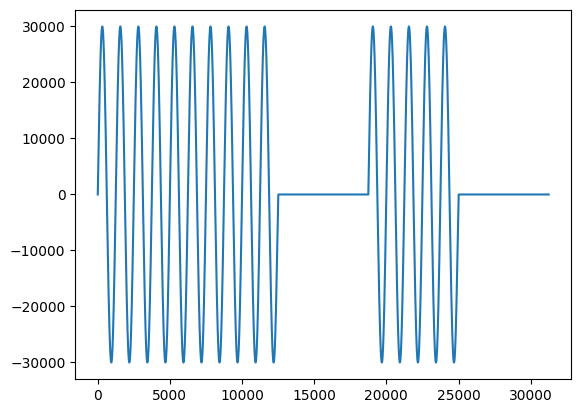

In [76]:
plt.plot(wave_point_420)

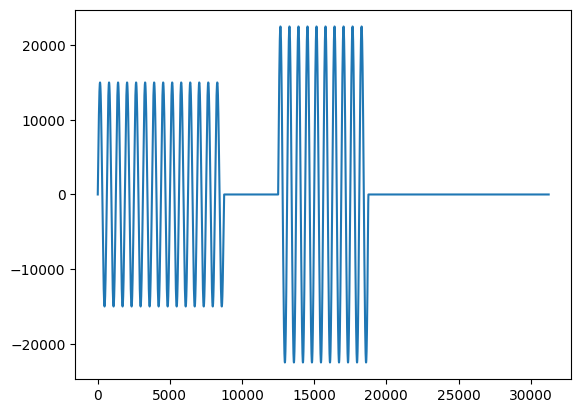

In [77]:
plt.plot(wave_point_1013)

In [81]:
a = np.array([1, 3, 5, 6, 7, 8, 12, 11])
b = np.array([2, 3, 1, 2, 1, 23, 1, 2])

# then we insert wave_point_1013 into wave_point_420 to construct wave_point
idx = tuple(range(1, 8 + 1))
wave_point = np.insert(a, idx, b)
print(wave_point)

[ 1  2  3  3  5  1  6  2  7  1  8 23 12  1 11  2]


In [88]:
MEGA(1250) * 5 * 10 ** -6

6250.0

In [89]:
CHANNEL0 = 0x00000001
CHANNEL1 = 0x00000002

In [90]:
(CHANNEL0 | CHANNEL1)

3

In [93]:
1024 * 64 / MEGA(1250) * 10 ** 6 / 2

26.2144

In [2]:
a = np.linspace(10, 20, 10)
b = np.arange(0, len(a), 2)
print(a, b)
print(a[b])

[10.         11.11111111 12.22222222 13.33333333 14.44444444 15.55555556
 16.66666667 17.77777778 18.88888889 20.        ] [0 2 4 6 8]
[10.         12.22222222 14.44444444 16.66666667 18.88888889]


In [11]:
file = open("../initialize/test.txt", 'w')
file.write("nihao\n")
file.write("nihao\n")
file.close()

In [37]:
file = open("../initialize/initial_config.txt")

line = file.readline()
x = line.split(' ')
object_name = x[0]
object_value = x[1]
object_type = x[2]

print(line.split(' '))
# for line in file.readlines():
#     print(line)

file.close()

['clock_frequency', '0', 'QComboBox', '\n']


In [48]:
a=int64(32)
print(type(a))
print(type(a.value))

<class 'ctypes.c_longlong'>
<class 'int'>


In [40]:
(32//32+1)*32

64

In [42]:
def mem_size_length(length_wave):
    if length_wave % 32 == 0:
        return length_wave
    else:
        return (length_wave // 32 + 1) * 32

In [46]:
mem_size_length(65)

96